In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurazione
plt.style.use('ggplot')  # Stile grafico
CHP_POWER = 800  # Produzione costante CHP in kW
MAX_ROWS = 8736  # Numero di righe da considerare (1-8736)

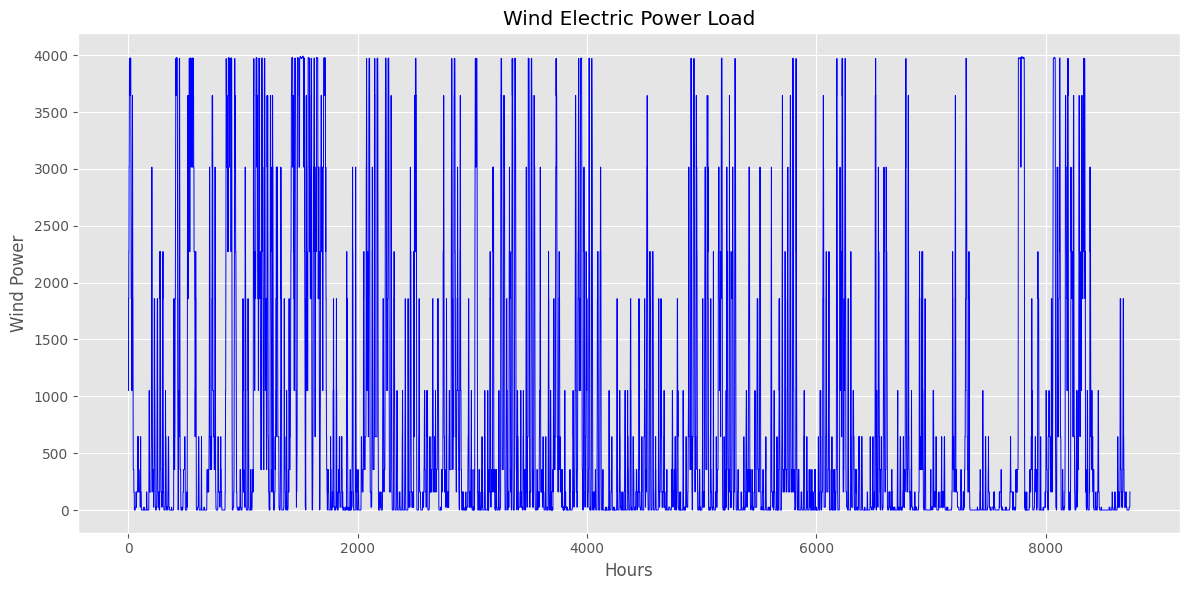

In [ ]:
# Carica il CSV
df = pd.read_csv("/Energy/wind_speed_h.csv")

# Aggiungi una colonna "Ore" che va da 1 a 8736
df["Ore"] = range(0, len(df))

df["Electric Power"] = df["Electric Power"].apply(lambda x: max(x, 0))

# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(df["Ore"], df["Wind Power"], color='blue', linewidth=0.7)
plt.title("Wind Electric Power Load")
plt.xlabel("Hours")
plt.ylabel("Wind Power")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Crea il grafico
plt.figure(figsize=(12, 6))

plt.plot(df["Ore"], df["Wind + CHP"], label="Wind + CHP (800 costanti)", color='green', linewidth=0.7)

plt.title("Produzione di energia elettrica - Solo Wind vs Wind + CHP")
plt.xlabel("Ore")
plt.ylabel("Electric Power (unità)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Wind + CHP'

<Figure size 1200x600 with 0 Axes>

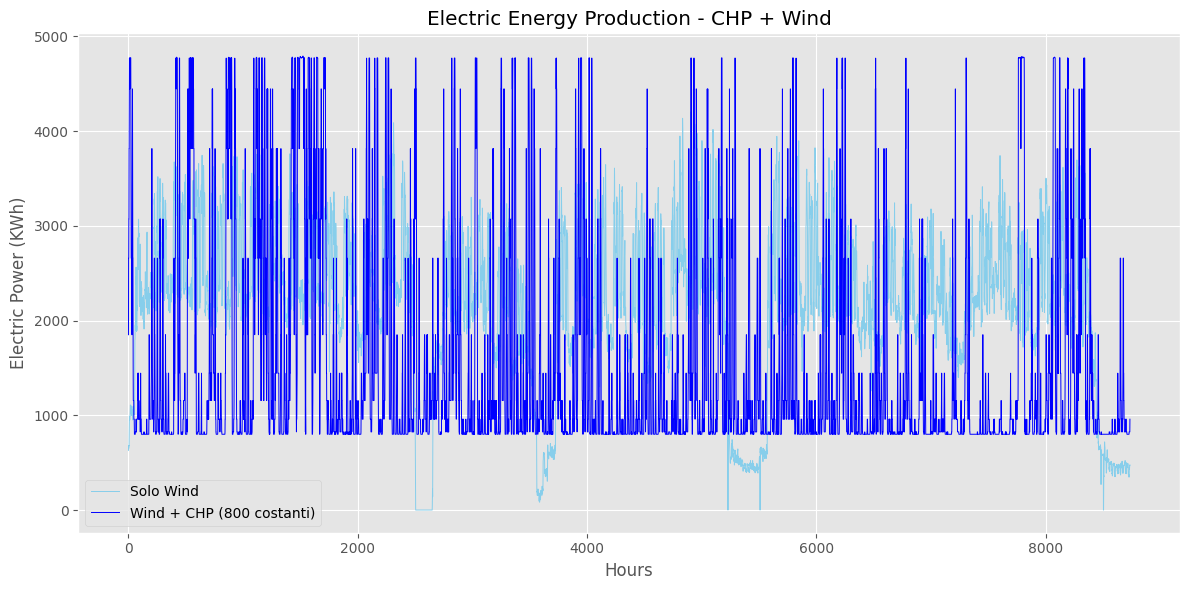

In [ ]:
# Crea la colonna del sistema combinato: Wind + CHP costante (800)
df["Wind + CHP"] = df["Wind Power"] + 800

# Crea il grafico
plt.figure(figsize=(12, 6))

plt.plot(df["Ore"], df["Electric Power"], label="Solo Wind", color='skyblue', linewidth=0.7)
plt.plot(df["Ore"], df["Wind + CHP"], label="Wind + CHP (800 costanti)", color='blue', linewidth=0.7)

plt.title("Electric Energy Production - CHP + Wind")
plt.xlabel("Hours")
plt.ylabel("Electric Power (KWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

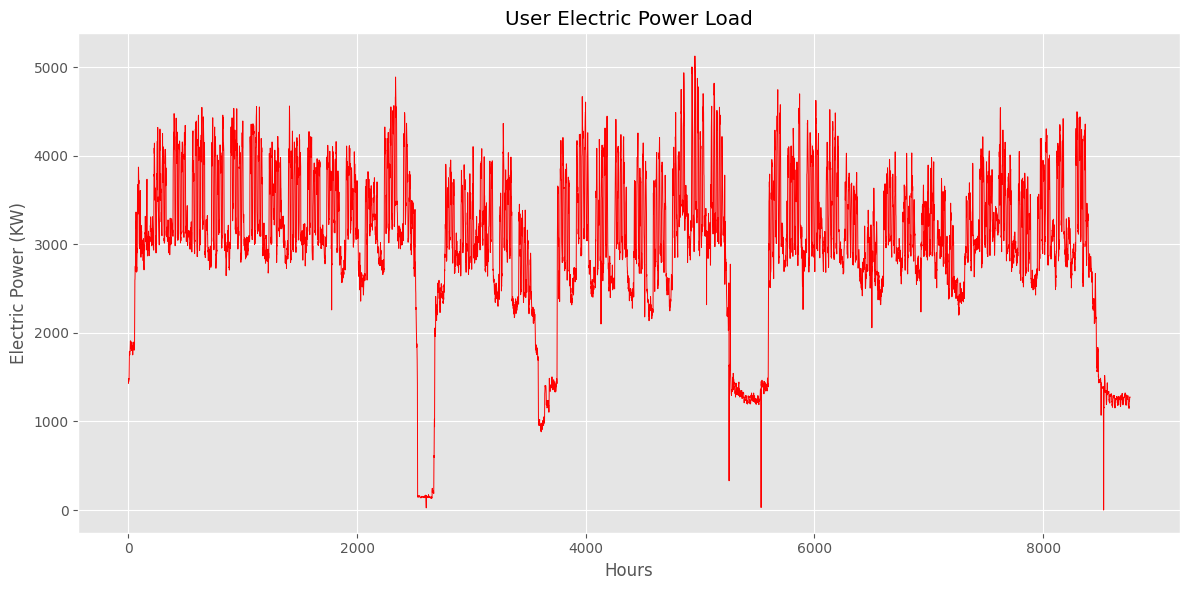

In [ ]:
# Carica il CSV
df = pd.read_csv("/Energy/load_preproc.csv")

# Aggiungi una colonna "Ore" che va da 1 a 8736
df["Ore"] = range(0, len(df))


# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(df["Ore"], df["Potenza Elettrica"], color='red', linewidth=0.7)
plt.title("User Electric Power Load")
plt.xlabel("Hours")
plt.ylabel("Electric Power (KW)")
plt.grid(True)
plt.tight_layout()
plt.show()

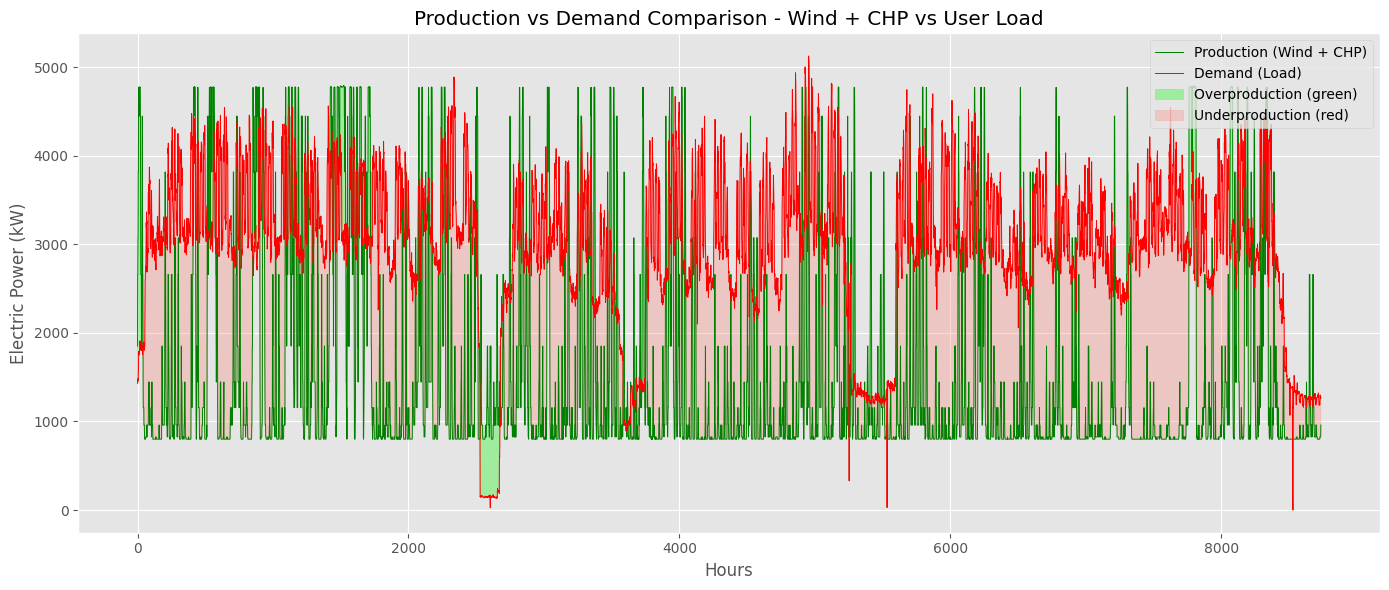

In [ ]:
# Configurazione
plt.style.use('ggplot')
CHP_POWER = 800
MAX_ROWS = 8736

# === Carica dataset eolico ===
df_wind = pd.read_csv("/Energy/wind_speed_h.csv")
df_wind["Ore"] = range(0, len(df_wind))
df_wind["Wind Power"] = df_wind["Wind Power"].apply(lambda x: max(x, 0))
df_wind["Wind + CHP"] = df_wind["Wind Power"] + CHP_POWER

# === Carica dataset Load ===
df_load = pd.read_csv("/Energy/load_preproc.csv")
df_load["Ore"] = range(0, len(df_load))

# === Allineamento ===
# Troncamento nel caso i due file abbiano righe diverse
min_len = min(len(df_wind), len(df_load))
df_wind = df_wind.iloc[:min_len]
df_load = df_load.iloc[:min_len]

# === Estrai i dati ===
ore = df_wind["Ore"]
produzione = df_wind["Wind + CHP"]
domanda = df_load["Potenza Elettrica"]

# === Grafico combinato con evidenziazione ===
plt.figure(figsize=(14, 6))

# Curve principali
plt.plot(ore, produzione, label="Production (Wind + CHP)", color='green', linewidth=0.7)
plt.plot(ore, domanda, label="Demand (Load)", color='red', linewidth=0.7)

# Aree colorate
plt.fill_between(ore, produzione, domanda,
                 where=(produzione > domanda),
                 interpolate=True,
                 color='lime', alpha=0.3, label='Overproduction (green)')

plt.fill_between(ore, produzione, domanda,
                 where=(produzione < domanda),
                 interpolate=True,
                 color='salmon', alpha=0.3, label='Underproduction (red)')

# Grafico finale
plt.title("Production vs Demand Comparison - Wind + CHP vs User Load")
plt.xlabel("Hours")
plt.ylabel("Electric Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calcola la differenza tra produzione e domanda
diff = produzione - domanda

# Energia da acquistare (quando produzione < domanda), in MWh
grid_buy_mwh = np.abs(diff[diff < 0]).sum() / 1000

# Energia da vendere (quando produzione > domanda), in MWh
grid_sell_mwh = diff[diff > 0].sum() / 1000

# Stampa i risultati
print(f"🔌 Energia da acquistare dalla rete (Grid Buy): {grid_buy_mwh:.2f} MWh")
print(f"⚡ Energia da vendere alla rete (Grid Sell): {grid_sell_mwh:.2f} MWh")

🔌 Energia da acquistare dalla rete (Grid Buy): 13991.76 MWh
⚡ Energia da vendere alla rete (Grid Sell): 1358.74 MWh


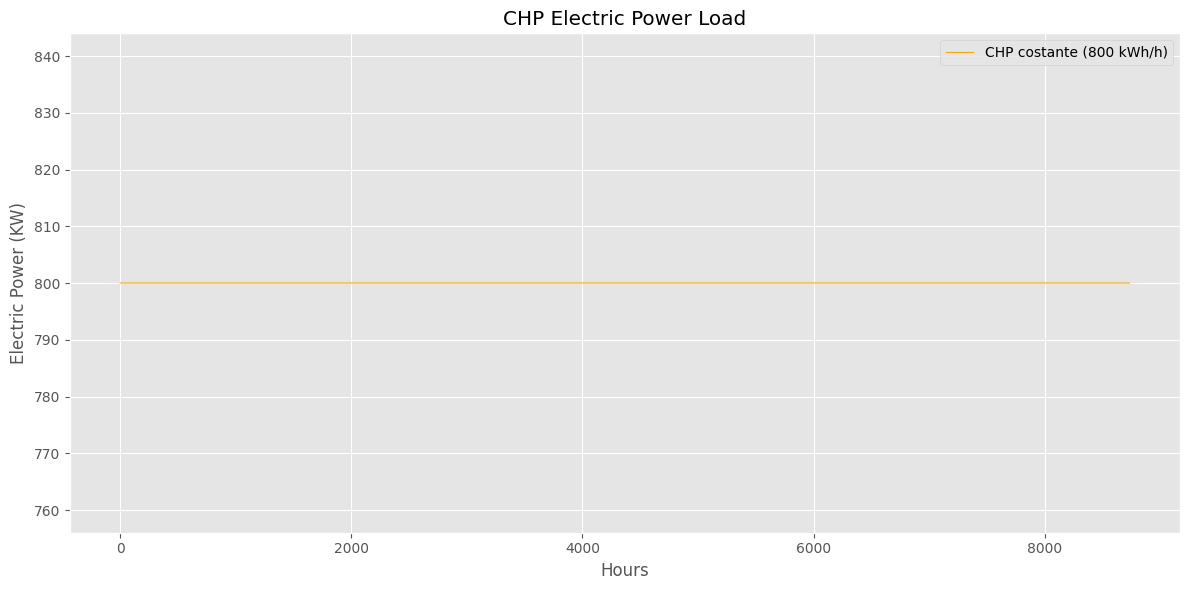

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ore totali dell'anno
ore = np.arange(8736)

# Produzione costante CHP (800 kWh ogni ora)
chp_produzione = np.full_like(ore, 800)

# Crea il grafico
plt.figure(figsize=(12, 6))
plt.plot(ore, chp_produzione, color='orange', linewidth=0.8, label="CHP costante (800 kWh/h)")

plt.title("CHP Electric Power Load")
plt.xlabel("Hours")
plt.ylabel("Electric Power (KW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Carica il dataset
df = pd.read_csv("/Energy/wind_speed_h.csv")

# Somma la produzione del Wind Power con il CHP costante (800 kWh)
df["Wind + CHP"] = df["Wind Power"] + 800

# Crea una funzione per calcolare la differenza tra produzione e domanda per ciascuna fascia
def calculate_energy_per_band(df):
    result = {}

    # Cicla attraverso le fasce orarie
    for band in df["Time Band"].unique():
        # Filtro i dati per la fascia corrente
        band_data = df[df["Time Band"] == band]

        # Calcola la differenza tra produzione e domanda
        diff = band_data["Wind + CHP"] - band_data["Electric Power"]

        # Energia da acquistare dalla rete (quando produzione < domanda)
        grid_buy_mwh = np.abs(diff[diff < 0]).sum() / 1000  # Converte in MWh

        # Energia da vendere alla rete (quando produzione > domanda)
        grid_sell_mwh = diff[diff > 0].sum() / 1000  # Converte in MWh

        # Salva i risultati per la fascia corrente
        result[band] = {
            "Grid Buy (MWh)": grid_buy_mwh,
            "Grid Sell (MWh)": grid_sell_mwh
        }

    return result

# Calcola l'energia per ciascuna fascia
energy_per_band = calculate_energy_per_band(df)

# Mostra i risultati
for band, values in energy_per_band.items():
    print(f"Fascia {band}:")
    print(f"🔌 Energia da acquistare dalla rete (Grid Buy): {values['Grid Buy (MWh)']:.2f} MWh")
    print(f"⚡ Energia da vendere alla rete (Grid Sell): {values['Grid Sell (MWh)']:.2f} MWh")
    print("-" * 50)

Fascia F3:
🔌 Energia da acquistare dalla rete (Grid Buy): 3801.84 MWh
⚡ Energia da vendere alla rete (Grid Sell): 824.65 MWh
--------------------------------------------------
Fascia F1:
🔌 Energia da acquistare dalla rete (Grid Buy): 2614.55 MWh
⚡ Energia da vendere alla rete (Grid Sell): 1653.88 MWh
--------------------------------------------------
Fascia F2:
🔌 Energia da acquistare dalla rete (Grid Buy): 2057.22 MWh
⚡ Energia da vendere alla rete (Grid Sell): 406.63 MWh
--------------------------------------------------


Risultati aggregati per fasce orarie:
             Sold to Grid  Buy from Grid     Total Load Total Production  \
Time Band                                                                  
F1         1653876.54 kWh  2614552.0 kWh  7167676.0 kWh   6207000.54 kWh   
F2          406627.62 kWh  2057218.0 kWh  4191671.0 kWh   2541080.62 kWh   
F3          824646.85 kWh  3801840.0 kWh  7720143.0 kWh   4742949.85 kWh   

           % Sold   % Buy  
Time Band                  
F1         26.65%  36.48%  
F2          16.0%  49.08%  
F3         17.39%  49.25%  


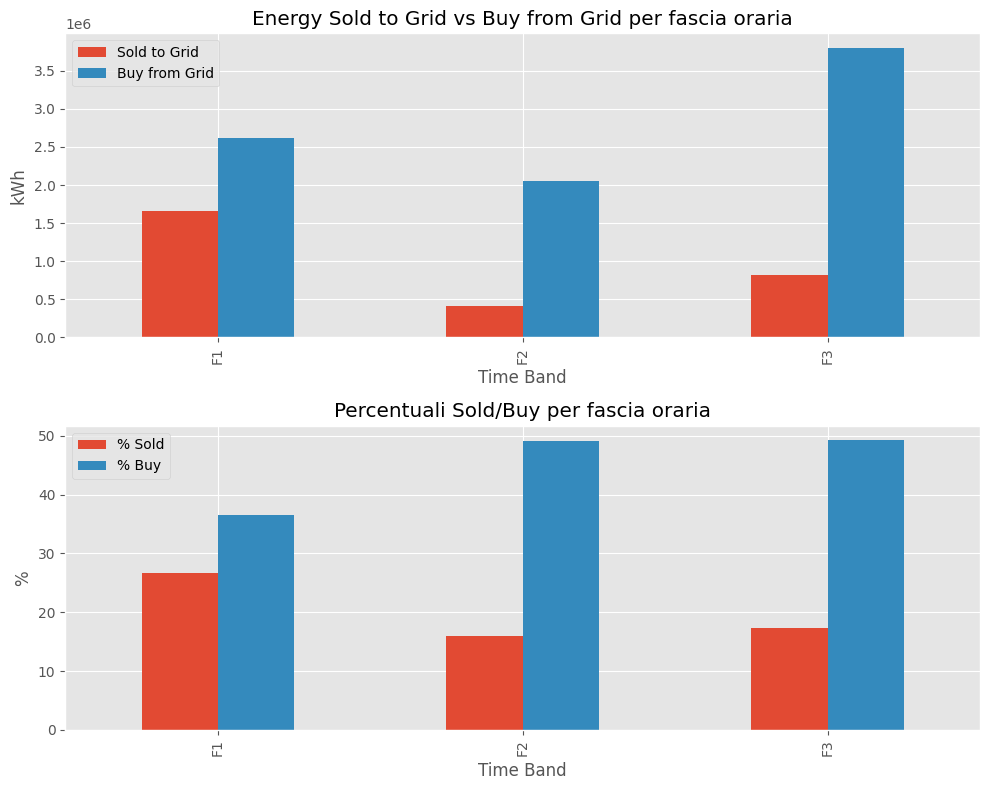


Risultati salvati in 'energy_balance_results.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurazioni
CHP_POWER = 800  # kWh costanti del CHP
FILE_PATH = '/Energy/wind_speed_h.csv'  # Sostituire con il percorso del file

# Carica i dati
try:
    df = pd.read_csv(FILE_PATH)

    # Verifica che le colonne necessarie esistano
    required_columns = ['time(UTC)', 'WS', 'Wind Power', 'Electric Power', 'Time Band']
    if not all(col in df.columns for col in required_columns):
        missing = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"Colonne mancanti nel file CSV: {missing}")

    # Calcola la potenza totale generata (CHP + eolico)
    df['Total Generation'] = CHP_POWER + df['Wind Power']

    # Calcola il bilancio energetico
    df['Energy Balance'] = df['Total Generation'] - df['Electric Power']

    # Categorizza come sold to grid o buy from grid
    df['Sold to Grid'] = df['Energy Balance'].apply(lambda x: x if x > 0 else 0)
    df['Buy from Grid'] = df['Energy Balance'].apply(lambda x: -x if x < 0 else 0)

    # Raggruppa per fascia oraria
    results = df.groupby('Time Band').agg({
        'Sold to Grid': 'sum',
        'Buy from Grid': 'sum',
        'Electric Power': 'sum',
        'Total Generation': 'sum'
    }).rename(columns={
        'Electric Power': 'Total Load',
        'Total Generation': 'Total Production'
    })

    # Aggiungi percentuali
    results['% Sold'] = (results['Sold to Grid'] / results['Total Production']) * 100
    results['% Buy'] = (results['Buy from Grid'] / results['Total Load']) * 100

    # Formattazione
    results_formatted = results.copy()
    for col in ['Sold to Grid', 'Buy from Grid', 'Total Load', 'Total Production']:
        results_formatted[col] = results_formatted[col].round(2).astype(str) + ' kWh'
    for col in ['% Sold', '% Buy']:
        results_formatted[col] = results_formatted[col].round(2).astype(str) + '%'

    # Stampa risultati
    print("Risultati aggregati per fasce orarie:")
    print(results_formatted)

    # Plot risultati
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    results[['Sold to Grid', 'Buy from Grid']].plot(kind='bar', ax=ax[0])
    ax[0].set_title('Energy Sold to Grid vs Buy from Grid per fascia oraria')
    ax[0].set_ylabel('kWh')
    ax[0].grid(True)

    results[['% Sold', '% Buy']].plot(kind='bar', ax=ax[1])
    ax[1].set_title('Percentuali Sold/Buy per fascia oraria')
    ax[1].set_ylabel('%')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Salva risultati in CSV
    results.to_csv('energy_balance_results.csv')
    print("\nRisultati salvati in 'energy_balance_results.csv'")

except FileNotFoundError:
    print(f"Errore: File non trovato al percorso {FILE_PATH}")
except Exception as e:
    print(f"Errore durante l'elaborazione: {str(e)}")